# Notebook 1: Data Exploration and Preprocessing

## ML-Based Drone Firmware Tampering Detection System

This notebook covers:
- Loading clean and tampered firmware datasets
- Exploratory Data Analysis (EDA)
- Data quality assessment
- Missing value handling
- Data preprocessing and cleaning
- Initial statistical analysis


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import os

warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
# Define data paths
DATA_DIR = Path('../data')
CLEAN_DATA_PATH = DATA_DIR / 'clean_drone_firmware_dataset.csv'
TAMPERED_DATA_PATH = DATA_DIR / 'tampered_drone_firmware_dataset.csv'

# Load datasets
print("Loading datasets...")
clean_df = pd.read_csv(CLEAN_DATA_PATH)
tampered_df = pd.read_csv(TAMPERED_DATA_PATH)

print(f"\nClean dataset shape: {clean_df.shape}")
print(f"Tampered dataset shape: {tampered_df.shape}")
print(f"\nClean dataset columns: {list(clean_df.columns)}")


Loading datasets...

Clean dataset shape: (1000, 28)
Tampered dataset shape: (1000, 28)

Clean dataset columns: ['firmware_id', 'drone_vendor', 'drone_model', 'firmware_version', 'file_name', 'file_format', 'file_size_bytes', 'sha256_hash', 'is_signed', 'signature_type', 'encryption_used', 'compression_used', 'cpu_architecture', 'os_type', 'bootloader_present', 'filesystem_detected', 'entropy_score', 'avg_section_entropy', 'max_section_entropy', 'string_count', 'num_executables', 'num_scripts', 'hardcoded_ip_count', 'hardcoded_url_count', 'crypto_function_count', 'boot_time_ms', 'emulated_syscalls', 'clean_label']


In [ ]:
# Display first few rows of clean dataset
print("=== Clean Dataset (First 5 rows) ===")
display(clean_df.head())

print("\n=== Tampered Dataset (First 5 rows) ===")
display(tampered_df.head())


=== Clean Dataset (First 5 rows) ===


,firmware_id,drone_vendor,drone_model,firmware_version,file_name,file_format,file_size_bytes,sha256_hash,is_signed,signature_type,...,max_section_entropy,string_count,num_executables,num_scripts,hardcoded_ip_count,hardcoded_url_count,crypto_function_count,boot_time_ms,emulated_syscalls,clean_label
0,FW0001,DJI,Phantom 4,v2.2.1,dji_phantom_4_1.fw,fw,11228452,364db767ded5545dcf1bf9646d9ecb2e302a48d2093f02...,1,RSA,...,7.42,19856,7,1,1,2,22,826,244,1
1,FW0002,Parrot,Bebop 2,v2.5.1,parrot_bebop_2_2.img,img,11323815,a281375635e987be20018dc13251f4b147cc5cd2b4a992...,1,RSA,...,7.31,6090,7,0,1,2,28,1587,230,1
2,FW0003,DJI,Phantom 4,v1.3.1,dji_phantom_4_3.fw,fw,9646997,8033be982a6d8027efa5eba6afabc5d332898c662e5415...,1,ECDSA,...,7.57,4339,3,1,0,1,29,1905,286,1
3,FW0004,Parrot,Bebop 2,v3.6.4,parrot_bebop_2_4.bin,bin,9685577,31892069ee3c0ec8dd1ea923d15b6b547026f7b1018b91...,1,RSA,...,7.30,10679,3,1,1,2,32,2435,142,1
4,FW0005,Parrot,Anafi,v1.1.2,parrot_anafi_5.fw,fw,18559643,4fc38a10767a72dba4f002236b3d263ba8910e71177a69...,1,RSA,...,7.87,2376,2,2,1,0,23,2580,90,1



=== Tampered Dataset (First 5 rows) ===


,firmware_id,drone_vendor,drone_model,firmware_version,file_name,file_format,file_size_bytes,sha256_hash,is_signed,signature_type,...,max_section_entropy,string_count,num_executables,num_scripts,hardcoded_ip_count,hardcoded_url_count,crypto_function_count,boot_time_ms,emulated_syscalls,clean_label
0,TFW0001,DJI,Phantom 4,v2.2.1,dji_phantom_4_1.fw,fw,11228452,364db767ded5545dcf1bf9646d9ecb2e302a48d2093f02...,0,NaN,...,8.61,19856,14,3,4,7,93,5015,1741,0
1,TFW0002,Parrot,Bebop 2,v2.5.1,parrot_bebop_2_2.img,img,11323815,a281375635e987be20018dc13251f4b147cc5cd2b4a992...,0,NaN,...,8.72,6090,9,2,2,5,112,4658,1673,0
2,TFW0003,DJI,Phantom 4,v1.3.1,dji_phantom_4_3.fw,fw,9646997,8033be982a6d8027efa5eba6afabc5d332898c662e5415...,0,NaN,...,8.23,4339,9,6,5,2,76,6380,1948,0
3,TFW0004,Parrot,Bebop 2,v3.6.4,parrot_bebop_2_4.bin,bin,9685577,31892069ee3c0ec8dd1ea923d15b6b547026f7b1018b91...,0,NaN,...,8.56,10679,15,6,2,4,35,6767,1978,0
4,TFW0005,Parrot,Anafi,v1.1.2,parrot_anafi_5.fw,fw,18559643,4fc38a10767a72dba4f002236b3d263ba8910e71177a69...,0,NaN,...,8.51,2376,11,7,2,6,45,6770,1297,0


In [ ]:
# Check data types and missing values
print("=== Clean Dataset Info ===")
print(clean_df.info())
print("\n=== Missing Values in Clean Dataset ===")
print(clean_df.isnull().sum())

print("\n=== Tampered Dataset Info ===")
print(tampered_df.info())
print("\n=== Missing Values in Tampered Dataset ===")
print(tampered_df.isnull().sum())


=== Clean Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   firmware_id            1000 non-null   object 
 1   drone_vendor           1000 non-null   object 
 2   drone_model            1000 non-null   object 
 3   firmware_version       1000 non-null   object 
 4   file_name              1000 non-null   object 
 5   file_format            1000 non-null   object 
 6   file_size_bytes        1000 non-null   int64  
 7   sha256_hash            1000 non-null   object 
 8   is_signed              1000 non-null   int64  
 9   signature_type         1000 non-null   object 
 10  encryption_used        1000 non-null   int64  
 11  compression_used       1000 non-null   int64  
 12  cpu_architecture       1000 non-null   object 
 13  os_type                1000 non-null   object 
 14  bootloader_present     1000 no

In [ ]:
# Statistical summary
print("=== Clean Dataset Statistical Summary ===")
display(clean_df.describe())

print("\n=== Tampered Dataset Statistical Summary ===")
display(tampered_df.describe())


In [ ]:
# Combine datasets for analysis
# Add a source column to track origin
clean_df['source'] = 'clean'
tampered_df['source'] = 'tampered'

# Combine datasets
combined_df = pd.concat([clean_df, tampered_df], ignore_index=True)

print(f"Combined dataset shape: {combined_df.shape}")
print(f"\nLabel distribution:")
print(combined_df['clean_label'].value_counts())
print(f"\nSource distribution:")
print(combined_df['source'].value_counts())


Combined dataset shape: (2000, 29)

Label distribution:
clean_label
1    1000
0    1000
Name: count, dtype: int64

Source distribution:
source
clean       1000
tampered    1000
Name: count, dtype: int64


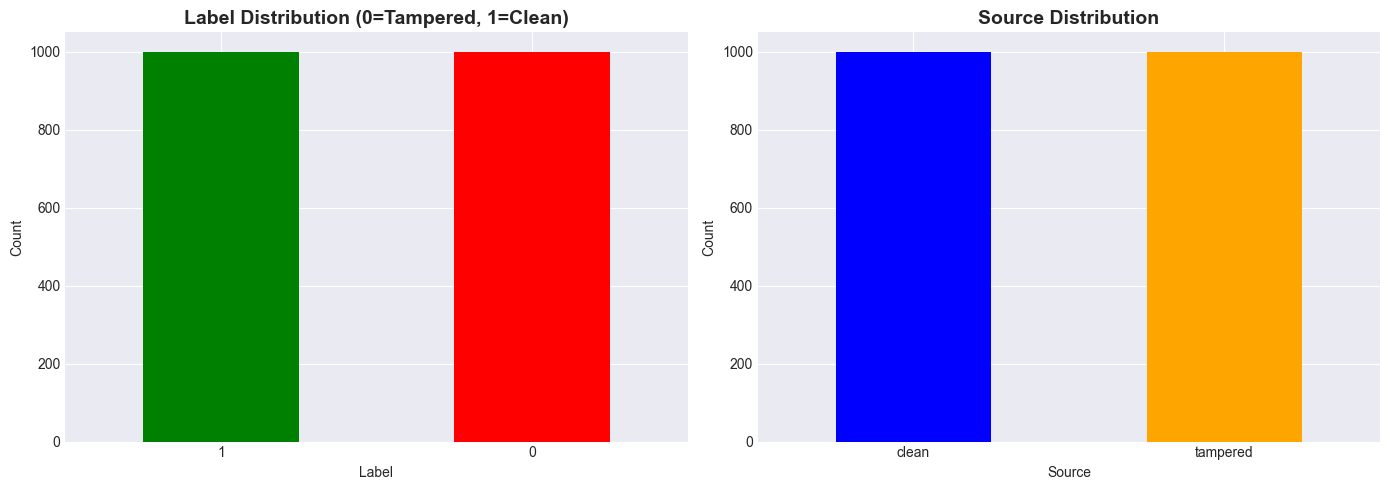

In [ ]:
# Visualize label distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Label distribution
combined_df['clean_label'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Label Distribution (0=Tampered, 1=Clean)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Source distribution
combined_df['source'].value_counts().plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Source Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Source')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


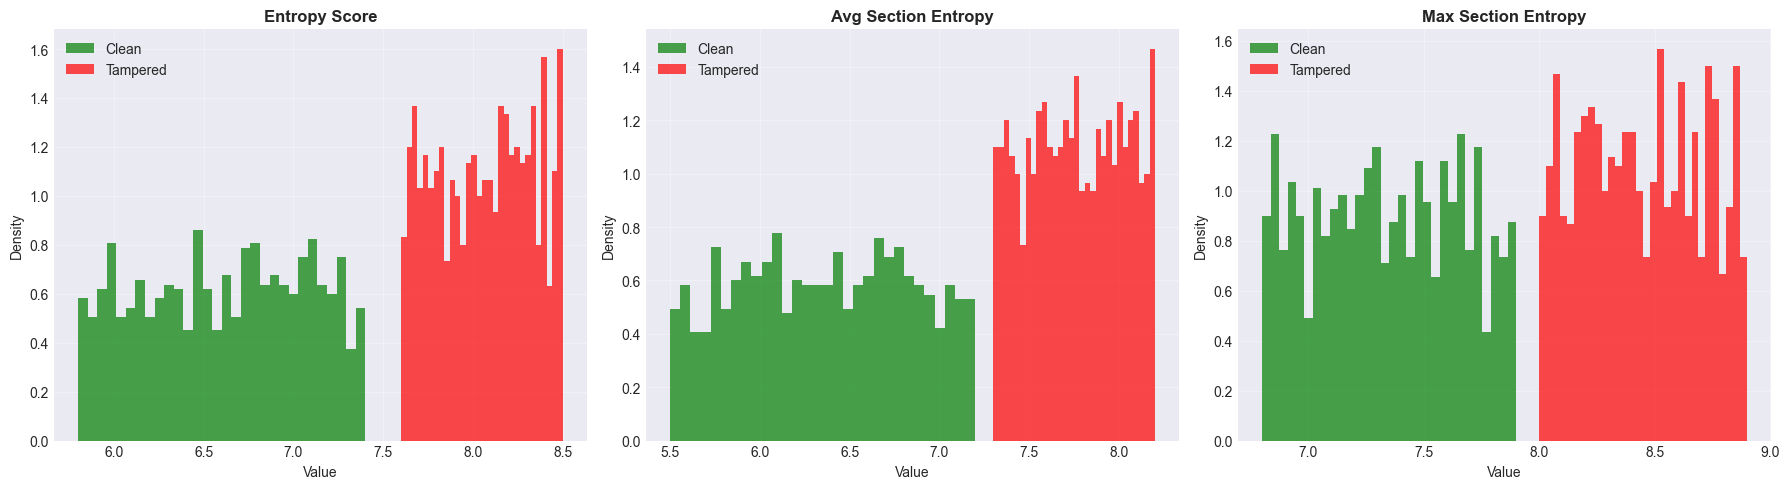

In [ ]:
# Analyze key features: Entropy scores
entropy_features = ['entropy_score', 'avg_section_entropy', 'max_section_entropy']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(entropy_features):
    clean_data = combined_df[combined_df['clean_label'] == 1][feature]
    tampered_data = combined_df[combined_df['clean_label'] == 0][feature]
    
    axes[idx].hist(clean_data, bins=30, alpha=0.7, label='Clean', color='green', density=True)
    axes[idx].hist(tampered_data, bins=30, alpha=0.7, label='Tampered', color='red', density=True)
    axes[idx].set_title(f'{feature.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Density')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


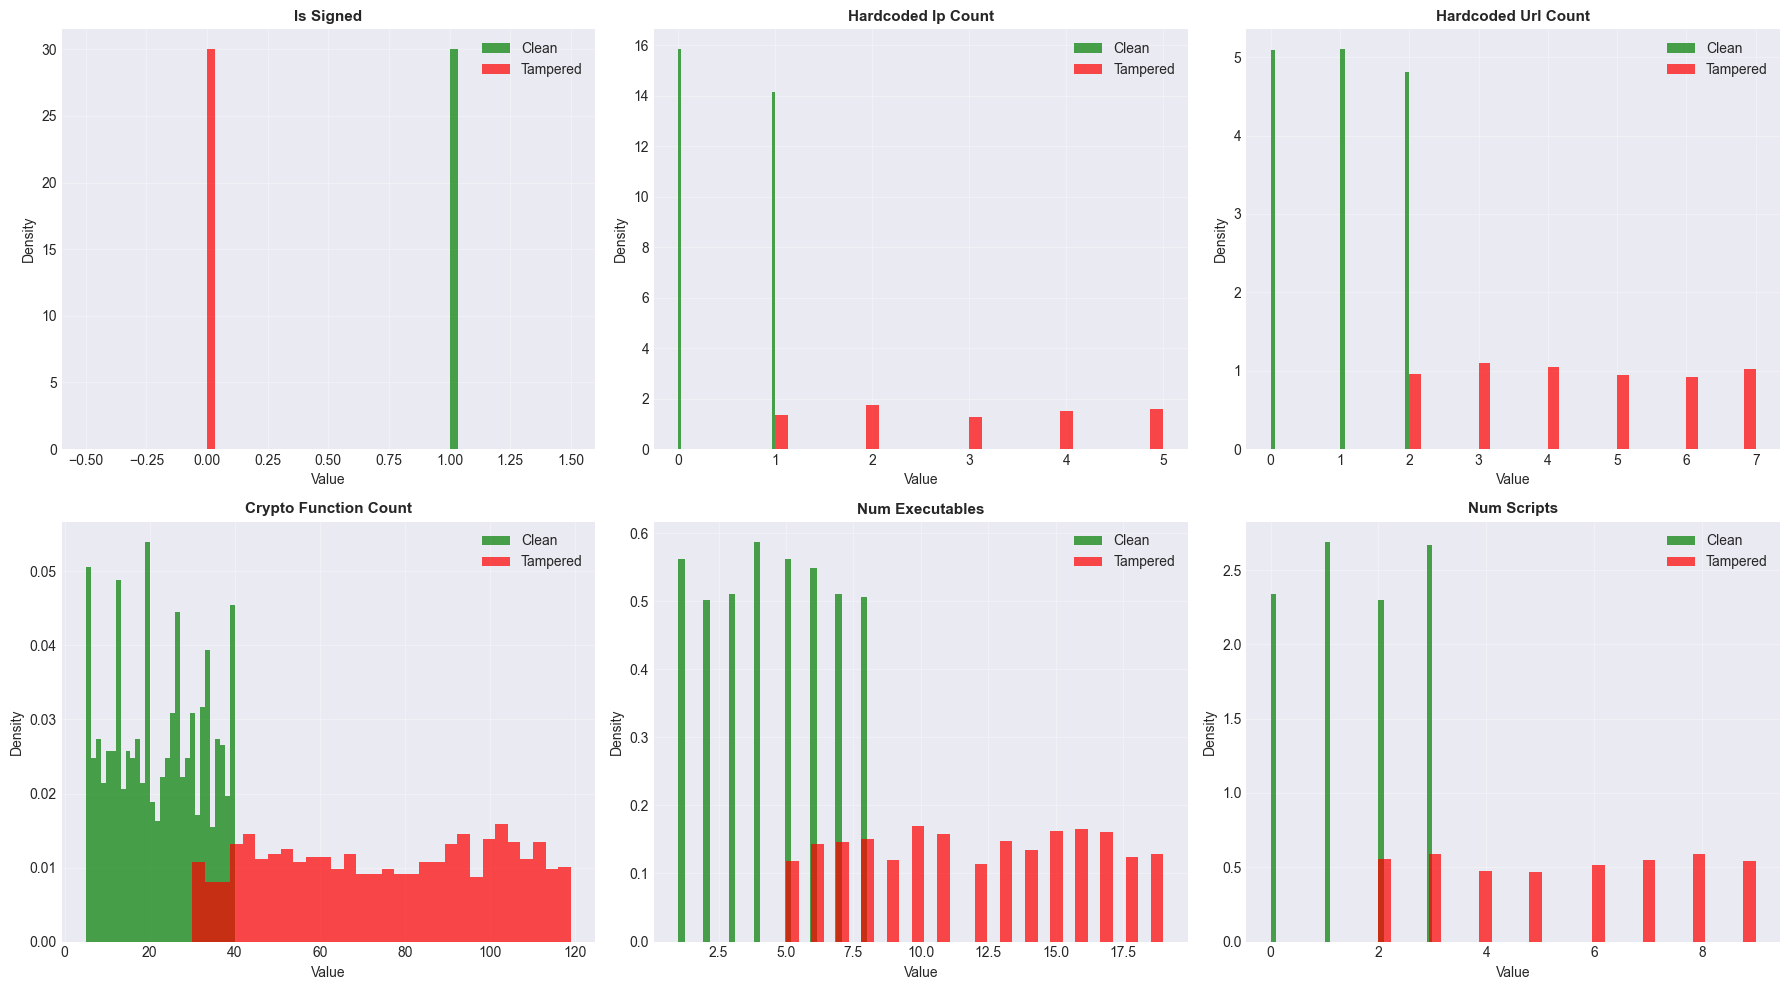

In [ ]:
# Analyze security-related features
security_features = ['is_signed', 'hardcoded_ip_count', 'hardcoded_url_count', 
                     'crypto_function_count', 'num_executables', 'num_scripts']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(security_features):
    clean_data = combined_df[combined_df['clean_label'] == 1][feature]
    tampered_data = combined_df[combined_df['clean_label'] == 0][feature]
    
    axes[idx].hist(clean_data, bins=30, alpha=0.7, label='Clean', color='green', density=True)
    axes[idx].hist(tampered_data, bins=30, alpha=0.7, label='Tampered', color='red', density=True)
    axes[idx].set_title(f'{feature.replace("_", " ").title()}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Density')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


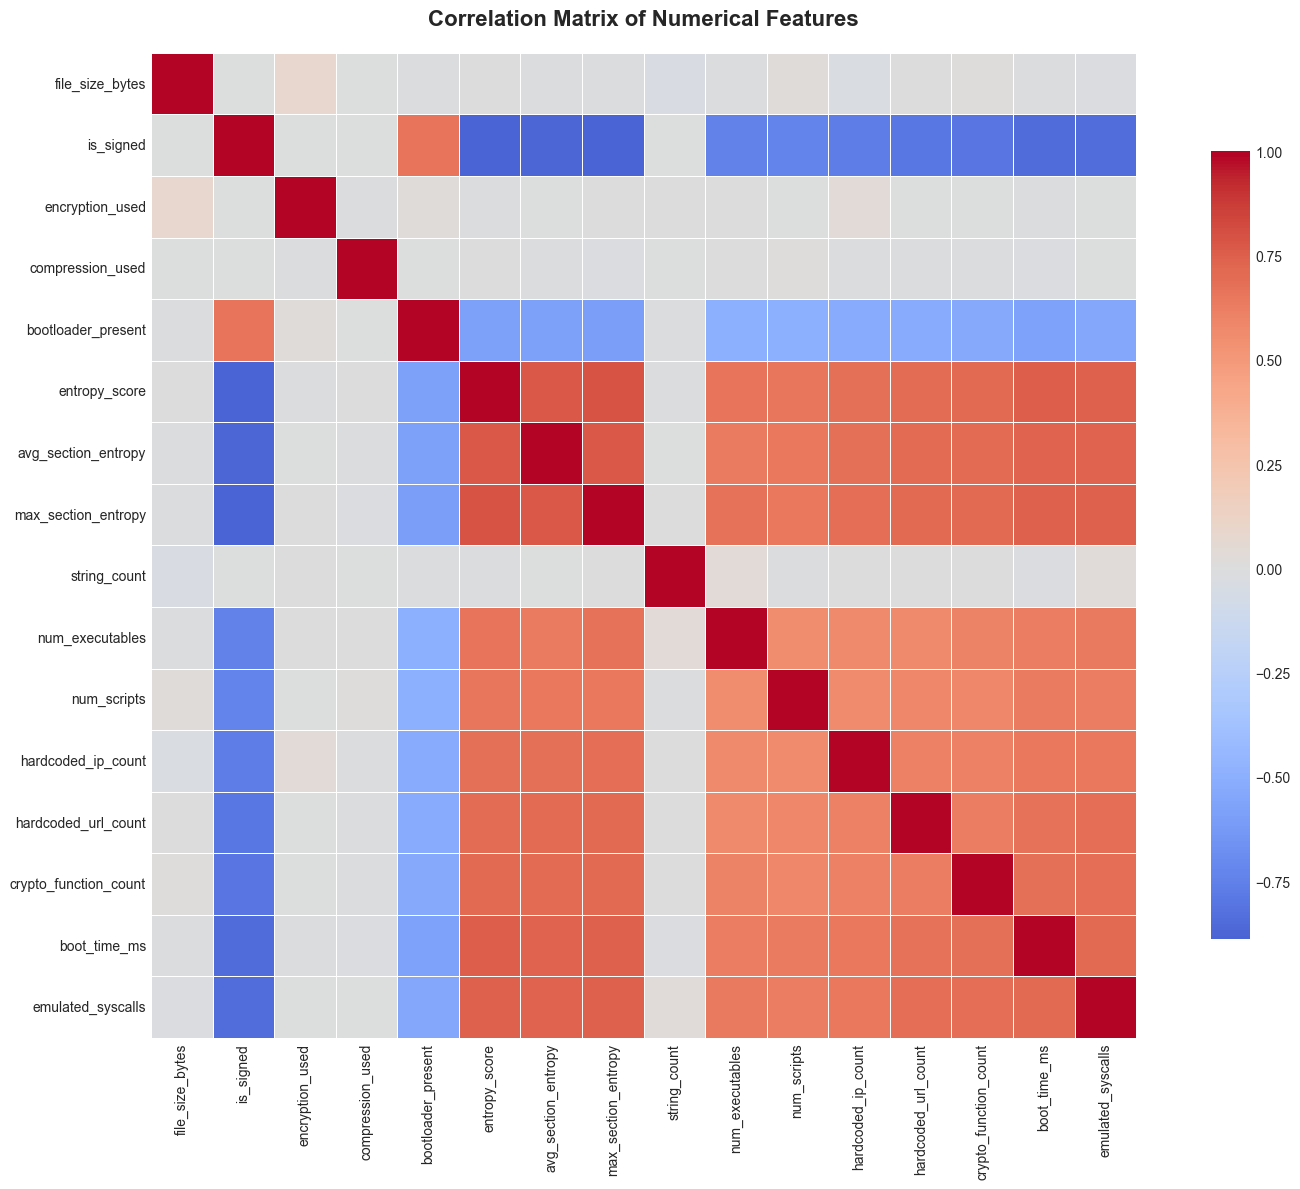

In [ ]:
# Correlation analysis for numerical features
numerical_features = combined_df.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID columns and labels
numerical_features = [f for f in numerical_features if f not in ['clean_label']]

correlation_matrix = combined_df[numerical_features].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [ ]:
# Handle missing values and prepare data for feature engineering
print("=== Preprocessing Data ===")

# Check for missing values in key columns
print("\nMissing values in key columns:")
key_columns = ['entropy_score', 'boot_time_ms', 'emulated_syscalls', 
               'crypto_function_count', 'hardcoded_ip_count', 'hardcoded_url_count']
print(combined_df[key_columns].isnull().sum())

# Fill missing values if any (using median for numerical, mode for categorical)
for col in combined_df.columns:
    if combined_df[col].isnull().sum() > 0:
        if combined_df[col].dtype in ['int64', 'float64']:
            combined_df[col].fillna(combined_df[col].median(), inplace=True)
        else:
            combined_df[col].fillna(combined_df[col].mode()[0] if len(combined_df[col].mode()) > 0 else 'Unknown', inplace=True)

print("\nMissing values after filling:")
print(combined_df[key_columns].isnull().sum().sum())


=== Preprocessing Data ===

Missing values in key columns:
entropy_score            0
boot_time_ms             0
emulated_syscalls        0
crypto_function_count    0
hardcoded_ip_count       0
hardcoded_url_count      0
dtype: int64

Missing values after filling:
0


In [ ]:
# Save preprocessed data
OUTPUT_DIR = Path('../data')
combined_df.to_csv(OUTPUT_DIR / 'combined_preprocessed_dataset.csv', index=False)
print(f"Preprocessed dataset saved to {OUTPUT_DIR / 'combined_preprocessed_dataset.csv'}")
print(f"Final dataset shape: {combined_df.shape}")

# Summary statistics
print("\n=== Dataset Summary ===")
print(f"Total samples: {len(combined_df)}")
print(f"Clean samples: {len(combined_df[combined_df['clean_label'] == 1])}")
print(f"Tampered samples: {len(combined_df[combined_df['clean_label'] == 0])}")
print(f"Features: {len(combined_df.columns)}")


Preprocessed dataset saved to ..\data\combined_preprocessed_dataset.csv
Final dataset shape: (2000, 29)

=== Dataset Summary ===
Total samples: 2000
Clean samples: 1000
Tampered samples: 1000
Features: 29
